### Seasonal Analysis of Fuel Consumption and Efficiency

In this analysis, we categorize the refueling data by season (Winter, Spring, Summer, and Autumn) based on the month of the refuel date. For each season, we calculate the average fuel consumption (L/100km) and fuel efficiency (km/L). This helps in understanding how these factors change across different seasons.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('car_refueling_data.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

df['Fuel consumption (L/100km)'] = (df['Liters'] / df['Kilometers Traveled']) * 100

df['Fuel Efficiency (km/L)'] = df['Kilometers Traveled'] / df['Liters']

def assign_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Date'].dt.month.apply(assign_season)

seasonal_analysis = df.groupby('Season').agg({
    'Fuel consumption (L/100km)': 'mean',
    'Fuel Efficiency (km/L)': 'mean'
}).round(2).reset_index()

### Seasonal Comparison of Fuel Consumption and Efficiency

This visualization compares the average fuel consumption (L/100km) and fuel efficiency (km/L) across different seasons. Two bar charts are displayed side by side:

    - Fuel consumption by season.
    - Fuel efficiency by season.

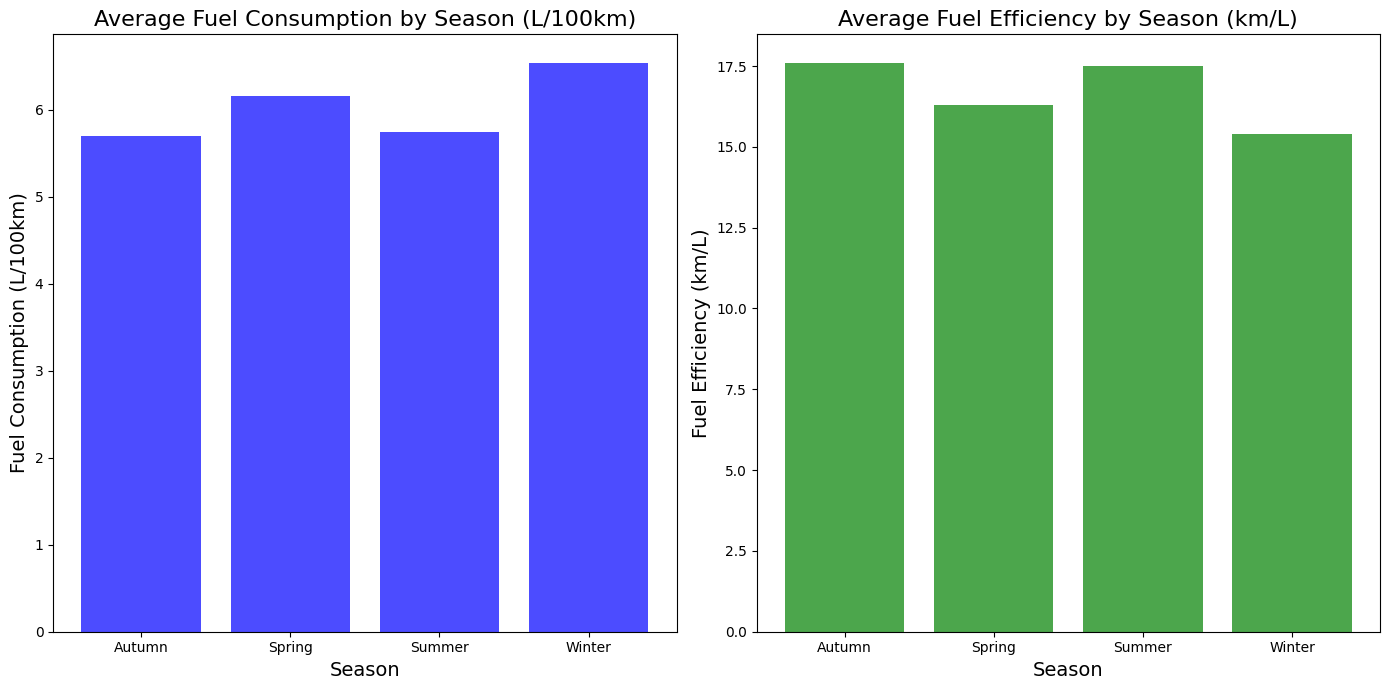

   Season  Fuel consumption (L/100km)  Fuel Efficiency (km/L)
0  Autumn                        5.70                   17.60
1  Spring                        6.16                   16.28
2  Summer                        5.75                   17.51
3  Winter                        6.54                   15.39


In [2]:
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

axes[0].bar(seasonal_analysis['Season'], seasonal_analysis['Fuel consumption (L/100km)'], color='b', alpha=0.7)
axes[0].set_title("Average Fuel Consumption by Season (L/100km)", fontsize=16)
axes[0].set_xlabel("Season", fontsize=14)
axes[0].set_ylabel("Fuel Consumption (L/100km)", fontsize=14)

axes[1].bar(seasonal_analysis['Season'], seasonal_analysis['Fuel Efficiency (km/L)'], color='g', alpha=0.7)
axes[1].set_title("Average Fuel Efficiency by Season (km/L)", fontsize=16)
axes[1].set_xlabel("Season", fontsize=14)
axes[1].set_ylabel("Fuel Efficiency (km/L)", fontsize=14)

plt.tight_layout()
plt.show()

print(seasonal_analysis)